In [139]:

import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import datetime as dt
import time

#ein impfstoff aber, hat keiner Nationalität 

# Supress Scientific notation in python
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display all columns of long dataframe
pd.set_option('display.max_columns', None)

# open cohort

e='h.csv'
df=pd.read_csv(e)
print(df)

          Date         Domain  Domain_code  Service_price Country   \
0     6/6/2018  BI_consultant          117             85      Ger   
1     6/3/2018  BI_consultant          117            119      Ger   
2     6/6/2018  Py_automation          101             30      Ger   
3     6/6/2018   Marketing_DA          104             65      Ger   
4     6/6/2018   Excel_Expert          102             29      Ger   
..         ...            ...          ...            ...      ...   
144   6/6/2020  BI_consultant          117             65  Belgium   
145   6/7/2020  BI_consultant          117             60  Belgium   
146   6/8/2020  BI_consultant          117             80  Belgium   
147   6/9/2020  BI_consultant          117             55  Belgium   
148  6/10/2020  BI_consultant          117             65  Belgium   

     Country_code  
0             303  
1             303  
2             303  
3             303  
4             303  
..            ...  
144           300  

In [140]:
df

,Date,Domain,Domain_code,Service_price,Country,Country_code
0,6/6/2018,BI_consultant,117,85,Ger,303
1,6/3/2018,BI_consultant,117,119,Ger,303
2,6/6/2018,Py_automation,101,30,Ger,303
3,6/6/2018,Marketing_DA,104,65,Ger,303
4,6/6/2018,Excel_Expert,102,29,Ger,303
...,...,...,...,...,...,...
144,6/6/2020,BI_consultant,117,65,Belgium,300
145,6/7/2020,BI_consultant,117,60,Belgium,300
146,6/8/2020,BI_consultant,117,80,Belgium,300
147,6/9/2020,BI_consultant,117,55,Belgium,300


In [141]:
#parse index
df['Date']=pd.to_datetime(df['Date'], infer_datetime_format=True)
indexeddf=df.set_index(['Date'])
#print(indexeddf)

In [142]:
#parsing to time format and extracting dates 
x=df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%y')

Day=df['Date'].dt.day_name()
Month=df['Date'].dt.month_name()
Year=df['Date'].dt.year

In [153]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month_name()
df['Day']=df['Date'].dt.day_name()
print(df)

          Date         Domain  Domain_code  Service_price Country   \
0   2018-06-06  BI_consultant          117             85      Ger   
1   2018-06-03  BI_consultant          117            119      Ger   
2   2018-06-06  Py_automation          101             30      Ger   
3   2018-06-06   Marketing_DA          104             65      Ger   
4   2018-06-06   Excel_Expert          102             29      Ger   
..         ...            ...          ...            ...      ...   
144 2020-06-06  BI_consultant          117             65  Belgium   
145 2020-06-07  BI_consultant          117             60  Belgium   
146 2020-06-08  BI_consultant          117             80  Belgium   
147 2020-06-09  BI_consultant          117             55  Belgium   
148 2020-06-10  BI_consultant          117             65  Belgium   

     Country_code  Year Month        Day  
0             303  2018  June  Wednesday  
1             303  2018  June     Sunday  
2             303  2018  June 

In [154]:
date_order = df['Date'].value_counts().index
domain_order = df['Domain'].value_counts().index
country_order = df['Country '].value_counts().index

In [155]:
df

,Date,Domain,Domain_code,Service_price,Country,Country_code,Year,Month,Day
0,2018-06-06,BI_consultant,117,85,Ger,303,2018,June,Wednesday
1,2018-06-03,BI_consultant,117,119,Ger,303,2018,June,Sunday
2,2018-06-06,Py_automation,101,30,Ger,303,2018,June,Wednesday
3,2018-06-06,Marketing_DA,104,65,Ger,303,2018,June,Wednesday
4,2018-06-06,Excel_Expert,102,29,Ger,303,2018,June,Wednesday
...,...,...,...,...,...,...,...,...,...
144,2020-06-06,BI_consultant,117,65,Belgium,300,2020,June,Saturday
145,2020-06-07,BI_consultant,117,60,Belgium,300,2020,June,Sunday
146,2020-06-08,BI_consultant,117,80,Belgium,300,2020,June,Monday
147,2020-06-09,BI_consultant,117,55,Belgium,300,2020,June,Tuesday


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text xticklabel objects>)

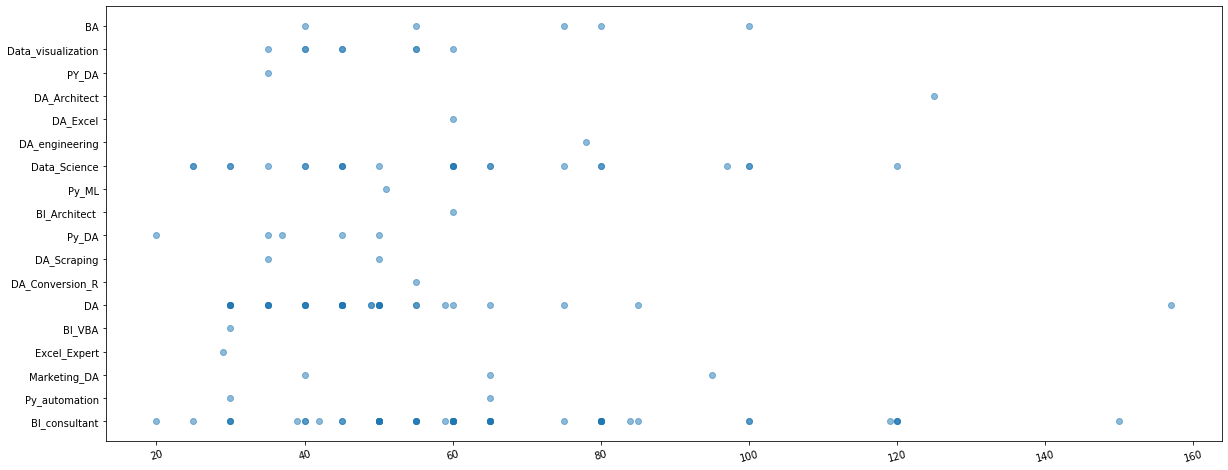

In [168]:
base_color = sns.color_palette()[5]
country_order = df['Country '].value_counts().index
price_order=df['Service_price'].value_counts().index

plt.figure(figsize=(20,8))
plt.scatter(data = df, y = 'Domain', x = 'Service_price', alpha=1/2)
plt.xticks(rotation=15)

In [176]:
ct_counts = df.groupby(['Country ', 'Month']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'Country ', columns = 'Month', values = 'count')
ct_counts.head()

Month,April,August,December,February,January,July,June,March,May,November,October,September
Country,,,,,,,,,,,,
Australia,7.00,nan,nan,9.00,nan,nan,nan,9.00,nan,nan,nan,nan
Belgium,4.00,nan,nan,nan,nan,nan,10.00,nan,12.00,nan,nan,nan
Fra,nan,6.00,nan,nan,nan,nan,nan,nan,nan,nan,9.00,10.00
Ger,nan,4.00,nan,nan,nan,10.00,9.00,nan,nan,nan,nan,nan
Luxembourg,nan,nan,6.00,nan,nan,nan,nan,nan,nan,4.00,nan,nan


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text xticklabel objects>)

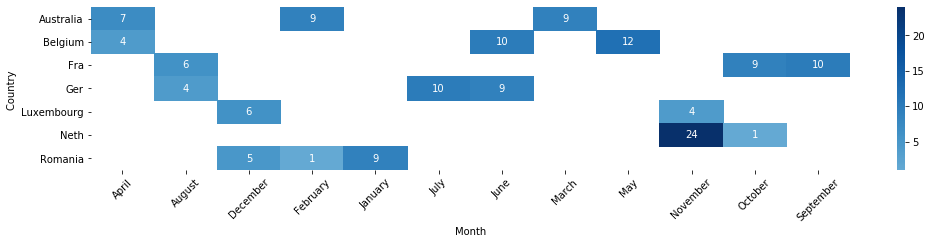

In [186]:
plt.figure(figsize=(17,3))
sns.heatmap(ct_counts, annot = True, cmap = 'Blues', center = 0)
plt.xticks(rotation=45)

In [179]:
domain_counts = df.groupby(['Domain', 'Month']).size()
domain_counts = domain_counts.reset_index(name='count')
domain_counts = domain_counts.pivot(index = 'Domain', columns = 'Month', values = 'count')
domain_counts.head()

Month,April,August,December,February,January,July,June,March,May,November,October,September
Domain,,,,,,,,,,,,
BA,1.00,nan,nan,nan,nan,nan,1.00,nan,3.00,nan,nan,nan
BI_Architect,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan
BI_VBA,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan
BI_consultant,5.00,3.00,3.00,4.00,3.00,2.00,8.00,5.00,5.00,11.00,3.00,4.00
DA,1.00,3.00,4.00,4.00,2.00,2.00,3.00,1.00,2.00,7.00,3.00,3.00


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text xticklabel objects>)

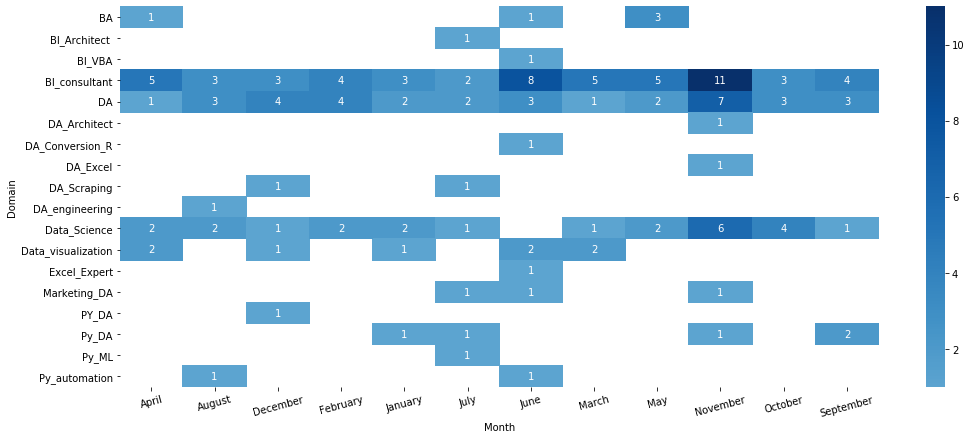

In [185]:
plt.figure(figsize=(17,7))
sns.heatmap(domain_counts, annot = True, cmap = 'Blues', center = 0)
plt.xticks(rotation=15)

In [147]:
country_order = travel_df['Country'].value_counts().index
date_order1=travel_df['2020-12'].value_counts().index
date_order2=travel_df['2020-04'].value_counts().index


In [91]:

base_color = sns.color_palette()[0]
travel_df['Country'].value_counts().index
date_order1=travel_df['2020-12'].value_counts().index
date_order2=travel_df['2020-04'].value_counts().index

In [92]:
travel_df

,Country,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02
0,European Union - 27 countries (from 2020),69953888,70815582,65976309,62987215,28598775,892797,1451132,4923834,0,0,0,0,0,0,0,0
1,European Union - 28 countries (2013-2020),78034692,79664377,74236706,0,0,0,0,0,0,0,0,0,0,0,0,0
2,European Union - 27 countries (2007-2013),77923413,79568800,74153205,70441267,33056386,1105878,1650222,5227350,0,0,0,0,0,0,0,0
3,Euro area - 19 countries (from 2015),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Belgium,2611508,2554224,2340520,2345828,1058082,17596,22975,109685,795201,935379,580349,472460,324998,462755,0,0
5,Bulgaria,584000,633175,620438,596013,293130,29572,77248,156857,438020,543762,404993,267838,134256,166890,0,0
6,Czechia,1282563,1348737,1088657,1037299,444914,4672,7663,37395,272997,377416,259224,120624,67046,103465,0,0
7,Denmark,2443406,2331267,2247098,2274056,978517,30861,49903,171539,654988,726795,561537,0,0,0,0,0
8,Germany (until 1990 former territory of the FRG),15703175,15340457,14069946,13659950,6503935,265803,397715,1323571,,5618984,4300025,3663114,1547855,1888478,1648149,0
9,Estonia,241243,234617,213359,211228,103004,2838,10370,24788,75126,83837,43096,0,0,0,0,0


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]),
 <a list of 8 Text xticklabel objects>)

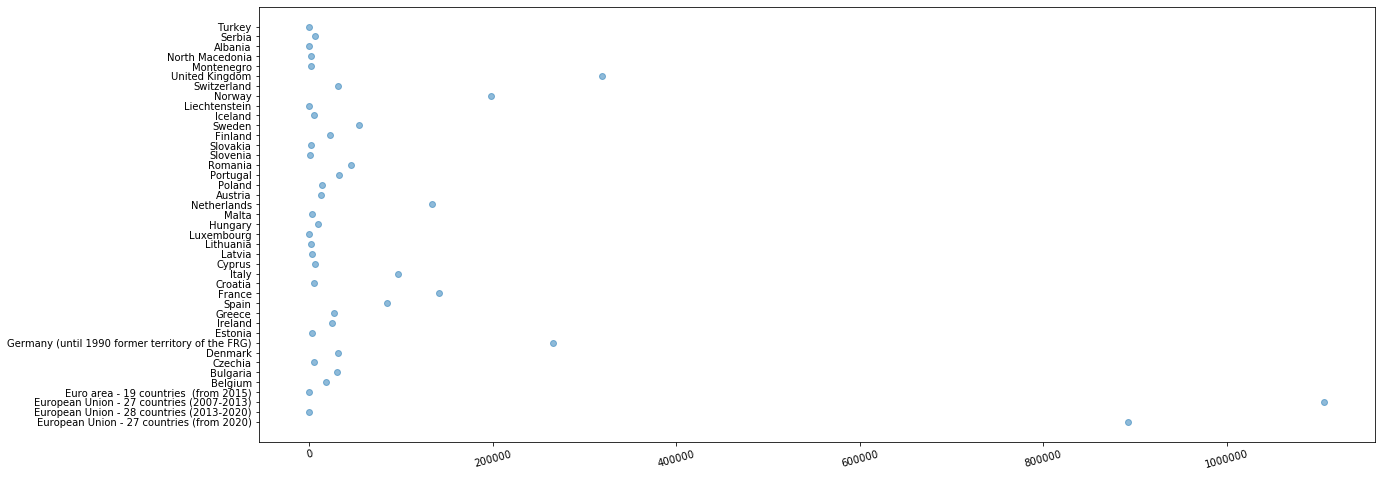

In [106]:
plt.figure(figsize=(20,8))
plt.scatter(data = travel_df, y = 'Country', x = '2020-04', alpha=1/2)
plt.xticks(rotation=15)

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000.]),
 <a list of 9 Text xticklabel objects>)

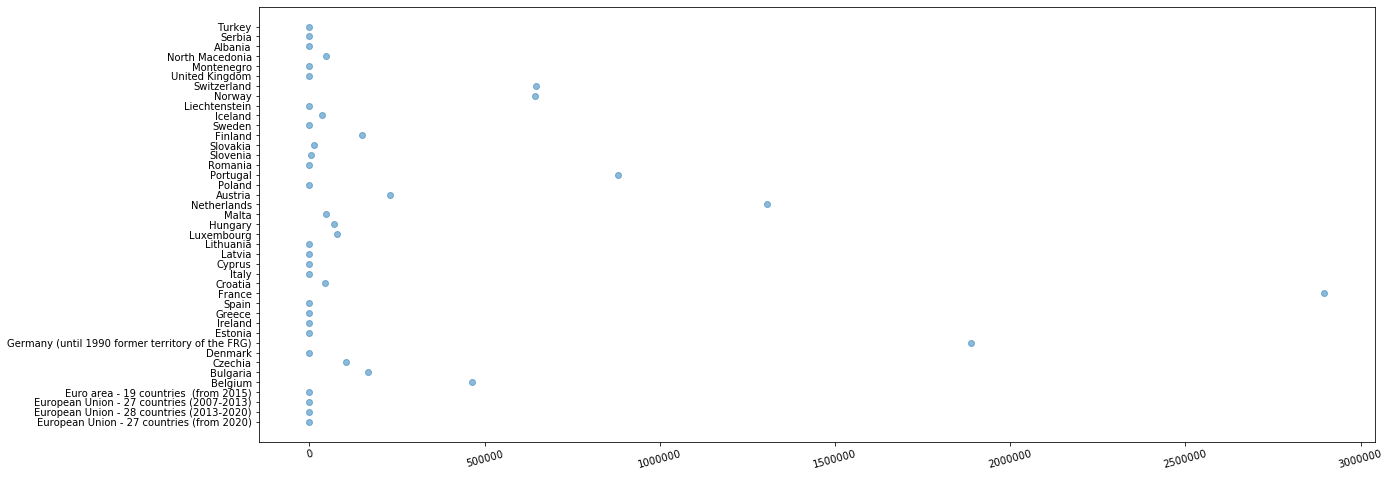

In [107]:
plt.figure(figsize=(20,8))
plt.scatter(data = travel_df, y = 'Country', x = '2020-12', alpha=1/2)
plt.xticks(rotation=15)

In [121]:
ct_counts = travel_df.groupby(['Country', '2020-04']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'Country', columns = '2020-04', values = 'count')
ct_counts.head()

2020-04,0,26,190,1375,1639,1853,1873,2355,2838,2910,4478,4672,5358,5894,6462,9483,12868,13423,17596,22138,24820,27068,29572,30665,30861,31985,44933,53595,84549,96047,134002,140897,197573,265803,319121,892797,1105878
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Austria,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Belgium,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bulgaria,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Croatia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5]),
 <a list of 37 Text xticklabel objects>)

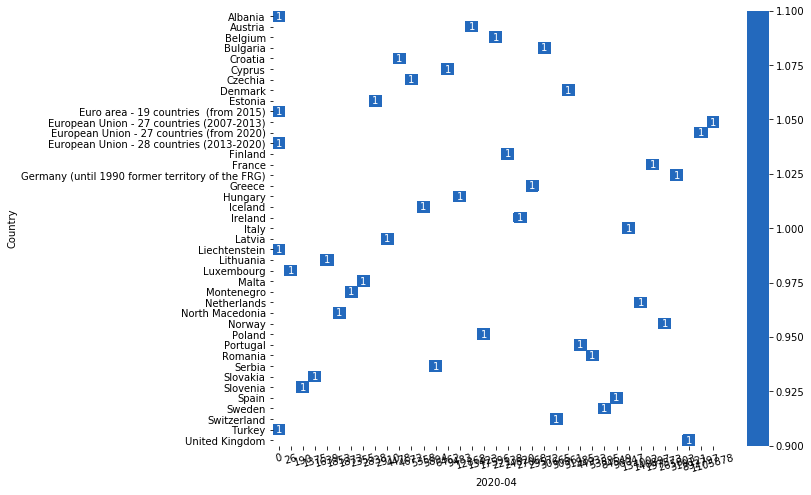

In [122]:
plt.figure(figsize=(10,8))
sns.heatmap(ct_counts, annot = True, cmap = 'vlag_r', center = 0)
plt.xticks(rotation=15) 